In [4]:
#import the modules 
import csv
import pandas as pd
import numpy as np
from random import randint
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from array import *
from scipy import stats
from scipy.stats import randint

In [5]:
#create a dataframe to store the data in
#let the system know a column is a date in the read_csv function
df = pd.read_csv('StressLevelDataset.csv')

In [8]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [10]:
#Numerical variables
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  21


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [12]:
#missing value check
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

count    1100.000000
mean        0.996364
std         0.821673
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: stress_level, dtype: float64


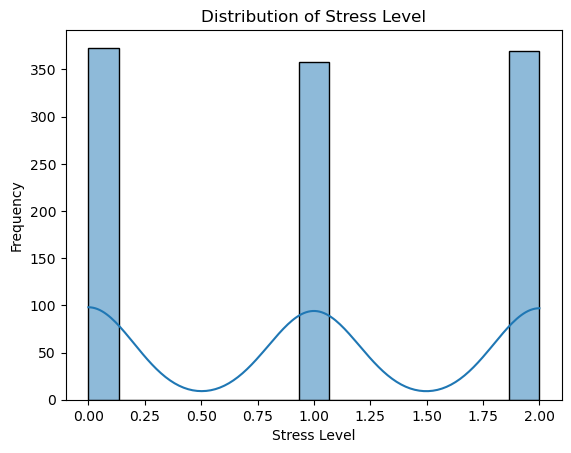

In [22]:
#Distribution of the target variable

# Summary statistics
print(df['stress_level'].describe())

# Distribution plot
sns.histplot(df['stress_level'], bins=15, kde=True)
plt.title("Distribution of Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()

self_esteem                    -0.756195
bullying                        0.751162
sleep_quality                  -0.749068
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
academic_performance           -0.720922
headache                        0.713484
safety                         -0.709602
basic_needs                    -0.708968
extracurricular_activities      0.692977
peer_pressure                   0.690684
teacher_student_relationship   -0.680163
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
social_support                 -0.632497
living_conditions              -0.581723
breathing_problem               0.573984
blood_pressure                  0.394200
Name: stress_level, dtype: float64


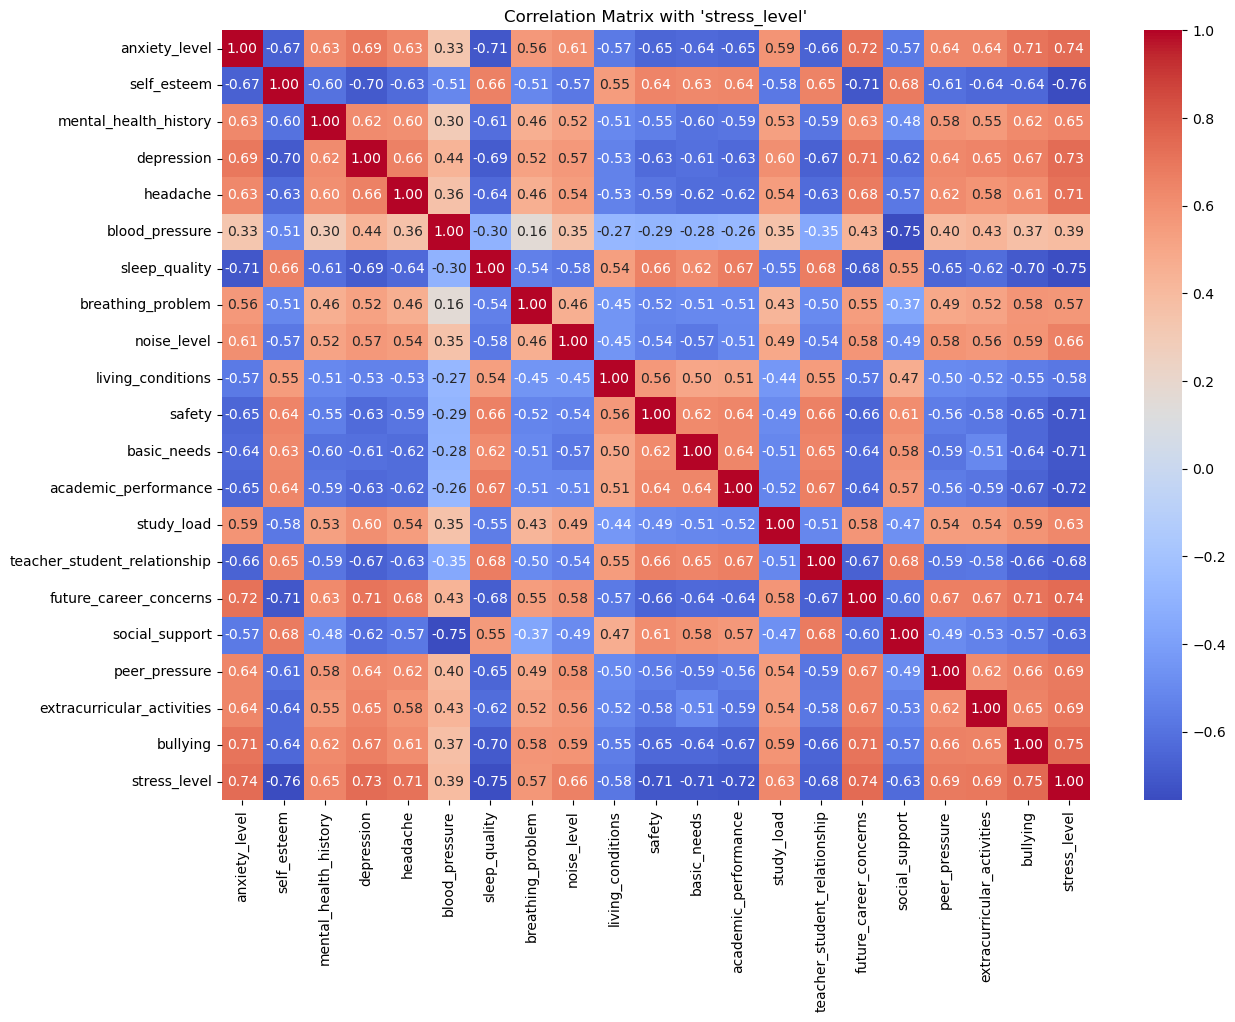

In [24]:
#Correlation Matrix
# Correlation of each feature with stress_level
correlations = df.corr(numeric_only=True)['stress_level'].drop('stress_level').sort_values(key=abs, ascending=False)
print(correlations)

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix with 'stress_level'")
plt.show()

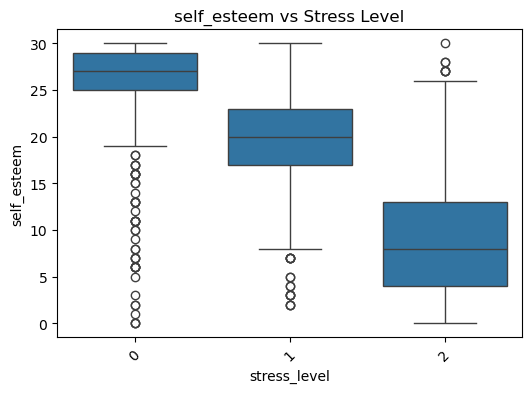

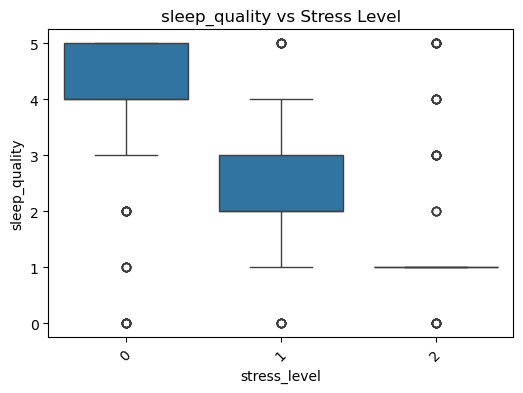

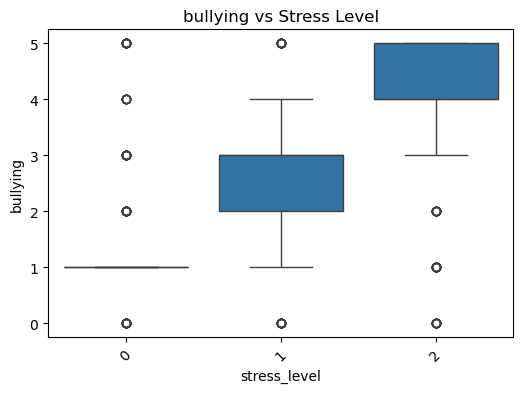

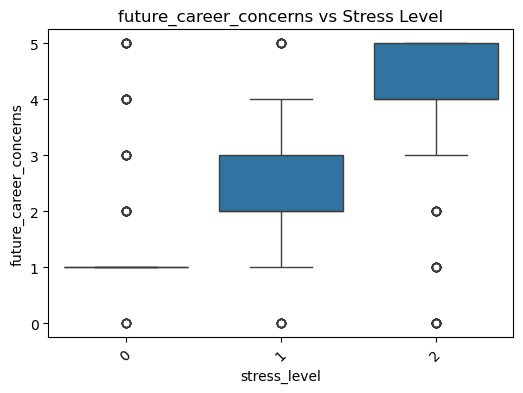

In [26]:
#stress level vs Key features
important_features = ['self_esteem', 'sleep_quality', 'bullying', 'future_career_concerns']

for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stress_level', y=feature, data=df)
    plt.title(f'{feature} vs Stress Level')
    plt.xticks(rotation=45)
    plt.show()

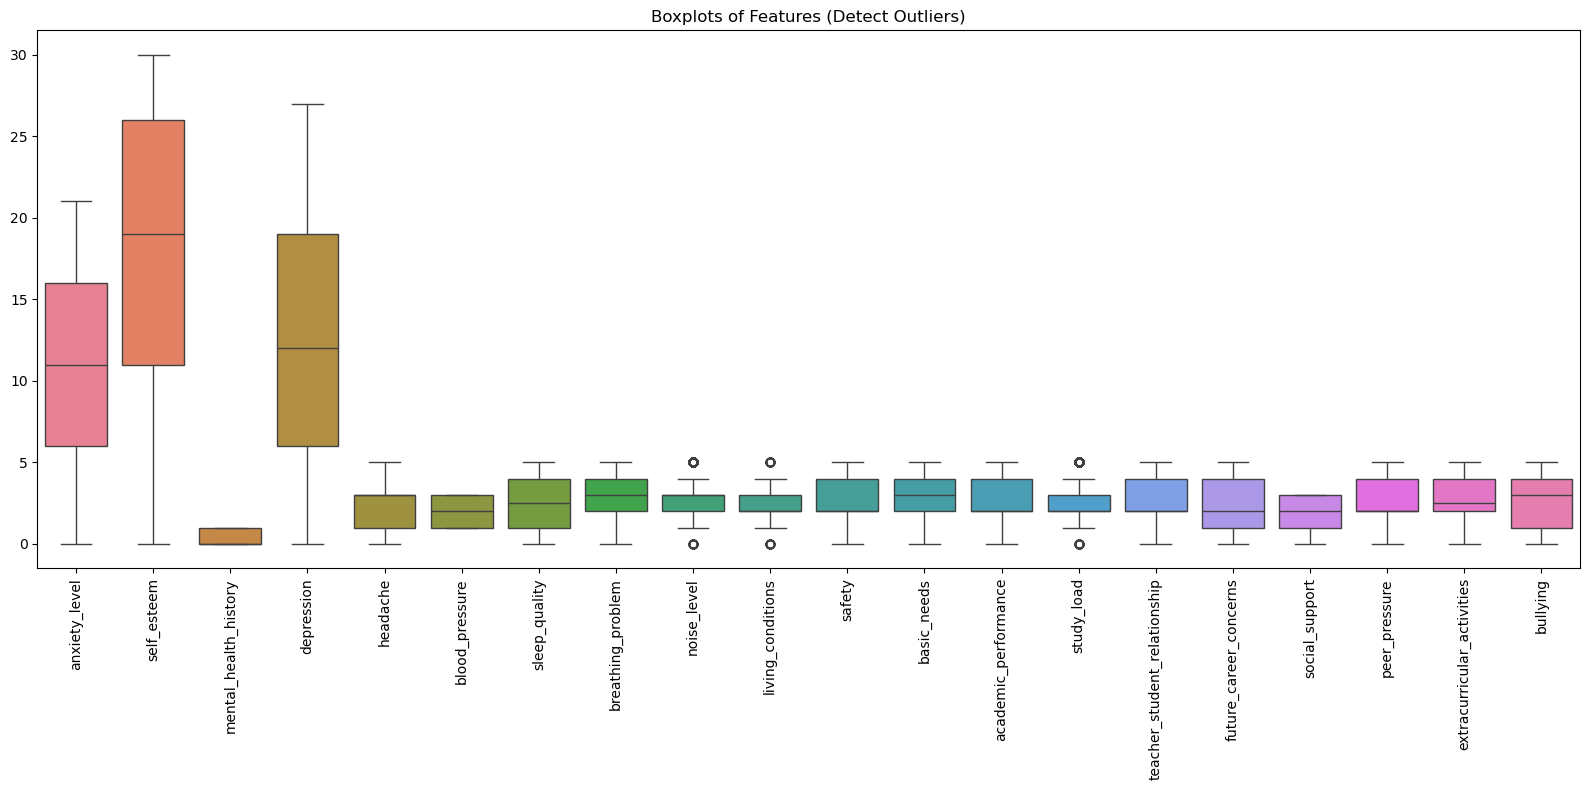

In [28]:
#outlier detection
predictors = df.drop('stress_level', axis=1)
plt.figure(figsize=(16, 8))
sns.boxplot(data=predictors)
plt.title("Boxplots of Features (Detect Outliers)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
# Keep only features with |correlation| ≥ 0.5
threshold = 0.5
high_corr_features = correlations[correlations.abs() >= threshold].index.tolist()

# Create new DataFrame
df_filtered = df[high_corr_features + ['stress_level']]
print("Remaining features:", df_filtered.columns.tolist())

Remaining features: ['self_esteem', 'bullying', 'sleep_quality', 'future_career_concerns', 'anxiety_level', 'depression', 'academic_performance', 'headache', 'safety', 'basic_needs', 'extracurricular_activities', 'peer_pressure', 'teacher_student_relationship', 'noise_level', 'mental_health_history', 'study_load', 'social_support', 'living_conditions', 'breathing_problem', 'stress_level']


In [32]:
df_filtered.head()

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs,extracurricular_activities,peer_pressure,teacher_student_relationship,noise_level,mental_health_history,study_load,social_support,living_conditions,breathing_problem,stress_level
0,20,2,2,3,14,11,3,2,3,2,3,3,3,2,0,2,2,3,4,1
1,8,5,1,5,15,15,1,5,2,2,5,4,1,3,1,4,1,1,4,2
2,18,2,2,2,12,14,2,2,3,2,2,3,3,2,1,3,2,2,2,1
3,12,5,1,4,16,15,2,4,2,2,4,4,1,4,1,4,1,2,3,2
4,28,5,5,2,16,7,4,2,4,3,0,5,1,3,0,3,1,2,1,1
